In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

C:\Users\zhang\AppData\Local\Temp\ipykernel_16656\1867929233.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
batch_size = 100
img_height = 300
img_width = 300

In [4]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data_collision/train/',
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'data_collision/test/',
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 'data_collision/val/',
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [5]:
class_names = training_ds.class_names
print(class_names)

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

img_shape = (img_height, img_width, 3)

['Accident', 'Non Accident']


In [6]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

9406464/9406464 [==============================] - 7s 1us/step


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 20)

Epoch 1/20
8/8 [==============================] - 34s 3s/step - loss: 0.7453 - accuracy: 0.5651 - val_loss: 0.5928 - val_accuracy: 0.6939
Epoch 2/20
8/8 [==============================] - 20s 3s/step - loss: 0.5058 - accuracy: 0.7560 - val_loss: 0.4636 - val_accuracy: 0.7245
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 0.3151 - accuracy: 0.8622 - val_loss: 0.2635 - val_accuracy: 0.8980
Epoch 4/20
8/8 [==============================] - 17s 2s/step - loss: 0.1759 - accuracy: 0.9267 - val_loss: 0.2105 - val_accuracy: 0.9184
Epoch 5/20
8/8 [==============================] - 17s 2s/step - loss: 0.1068 - accuracy: 0.9595 - val_loss: 0.2192 - val_accuracy: 0.9082
Epoch 6/20
8/8 [==============================] - 17s 2s/step - loss: 0.0644 - accuracy: 0.9798 - val_loss: 0.2313 - val_accuracy: 0.8878
Epoch 7/20
8/8 [==============================] - 17s 2s/step - loss: 0.0457 - accuracy: 0.9861 - val_loss: 0.2271 - val_accuracy: 0.9082
Epoch 8/20
8/8 [==================

In [10]:
# save the model params
model.save("AccidentDetectionModel.h5")

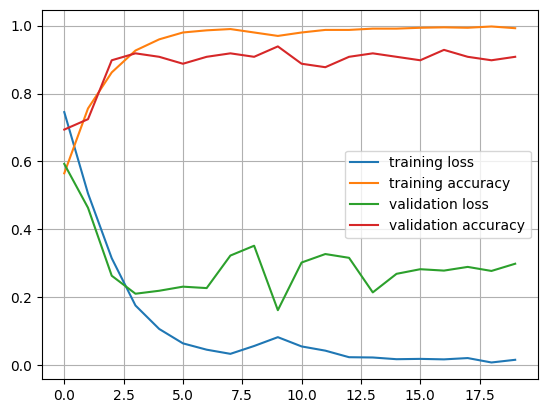

In [9]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()


plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

In [16]:
# import the trained model and parameters
trained_model = tf.keras.models.load_model("AccidentDetectionModel.h5")
acc_vector = []

n = 0
for images, labels in testing_ds.take(1):
    predictions = trained_model.predict(images)
    predict_labels = []  # class_names
    prdlbl = []  # index
    
    for p in predictions:
        predict_labels.append(class_names[np.argmax(p)])
        prdlbl.append(np.argmax(p))
    
    acc_vector = (np.array(prdlbl) == labels)
    print('accuracy: ', np.mean(acc_vector))

    if n==0:
        print('predictions:', predictions)
        print('predict_labels:', predict_labels)
        print('prdlbl:', prdlbl)
    
    n+=1

4/4 [==============================] - 4s 559ms/step
accuracy:  0.96
predictions: [[8.4654801e-03 9.9153453e-01]
 [3.7375238e-04 9.9962634e-01]
 [8.5139112e-04 9.9914861e-01]
 [9.9439472e-01 5.6051756e-03]
 [1.4174304e-06 9.9999851e-01]
 [4.7181707e-04 9.9952817e-01]
 [4.1460698e-03 9.9585378e-01]
 [2.9173808e-04 9.9970818e-01]
 [9.9991697e-01 8.2914208e-05]
 [9.9346364e-01 6.5362882e-03]
 [1.0034500e-03 9.9899662e-01]
 [2.3174805e-04 9.9976826e-01]
 [9.9995965e-01 4.0339881e-05]
 [2.8693144e-06 9.9999708e-01]
 [2.7501507e-02 9.7249854e-01]
 [9.9999994e-01 2.2501496e-08]
 [9.6345758e-01 3.6542427e-02]
 [9.9292487e-01 7.0750643e-03]
 [9.9999887e-01 1.0672304e-06]
 [9.9998862e-01 1.1329123e-05]
 [9.9888349e-01 1.1165013e-03]
 [9.6097255e-01 3.9027490e-02]
 [4.6035329e-05 9.9995393e-01]
 [6.3693768e-01 3.6306232e-01]
 [4.4178097e-03 9.9558210e-01]
 [2.4894730e-03 9.9751055e-01]
 [5.4616277e-07 9.9999934e-01]
 [9.9999982e-01 1.2551020e-07]
 [1.4590559e-07 9.9999982e-01]
 [2.1944908e-05 9.9

4/4 [==============================] - 3s 415ms/step
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


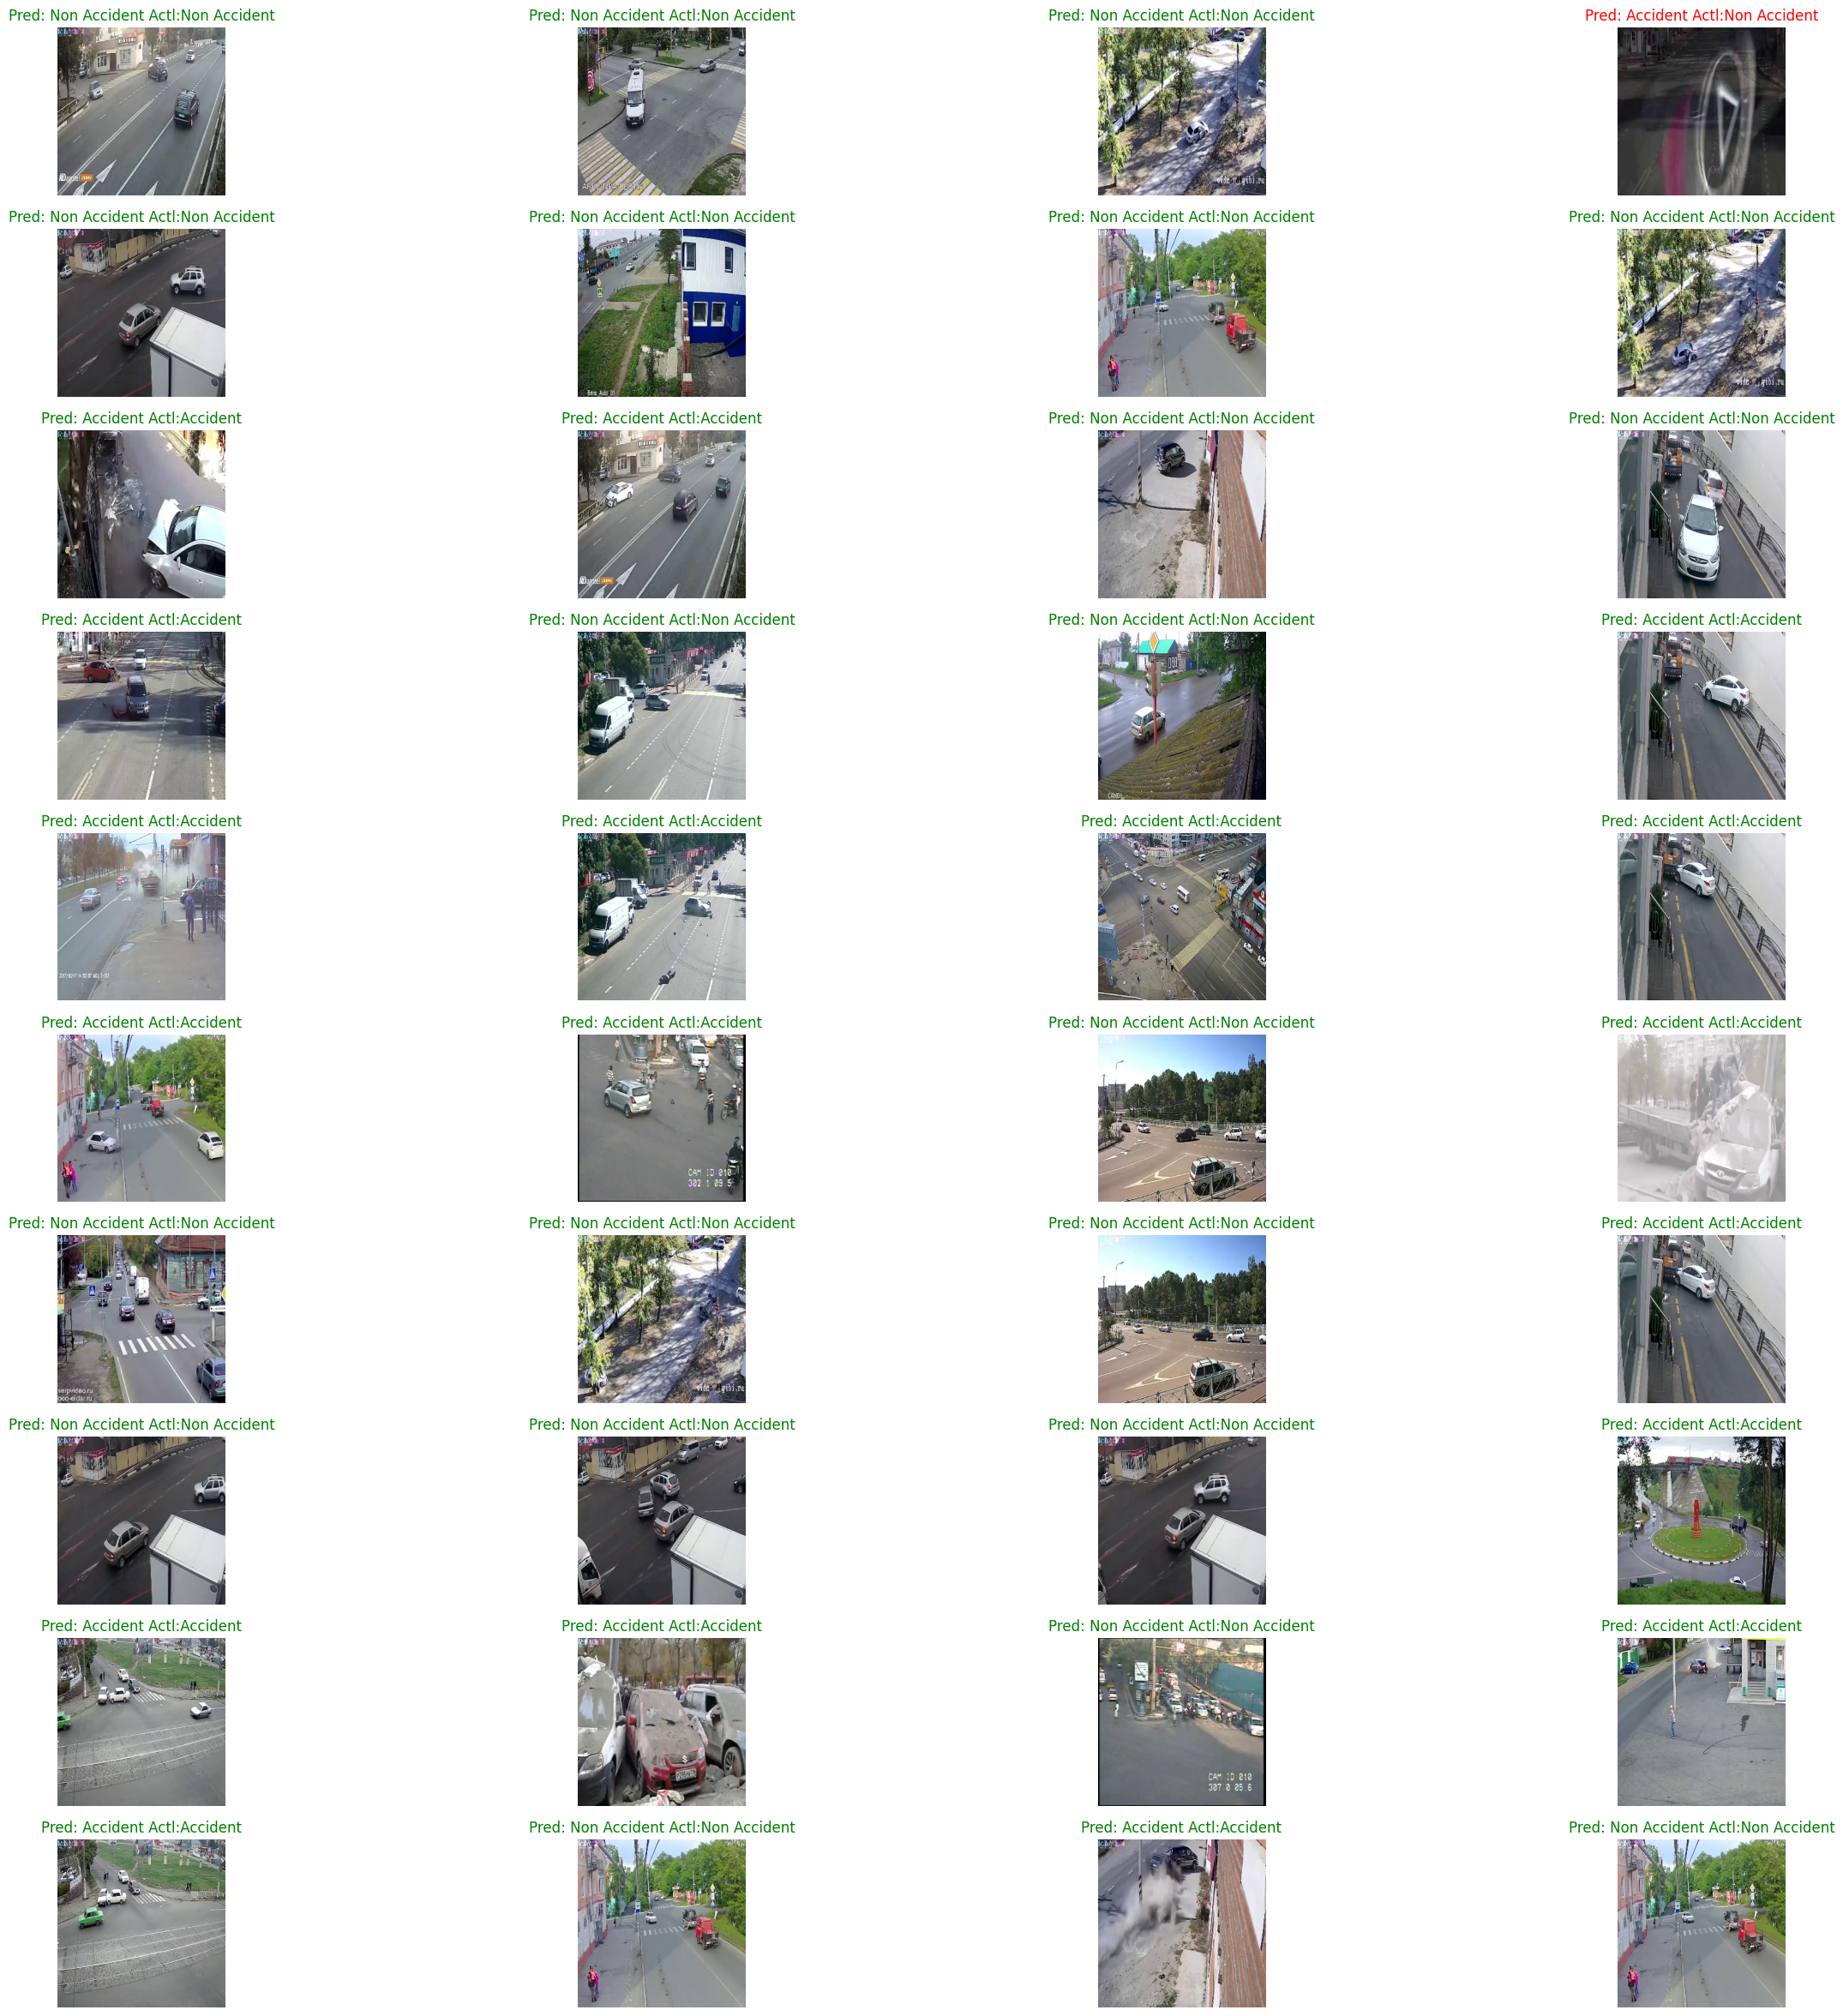

In [11]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):  # take first batch of the test data
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [14]:
image=[]
label=[]

c=1
cap= cv2.VideoCapture('data_collision/videoplayback_demo.mp4')
while True:
    grabbed, frame = cap.read()
    if c%30==0:
        print(c)
        resized_frame=tf.keras.preprocessing.image.smart_resize(frame, (img_height, img_width), interpolation='bilinear')
        image.append(frame)
        label.append(predict_frame(resized_frame))
        if(len(image)==75):
            break
    c+=1

cap.release()

30
1/1 [==============================] - 0s 97ms/step
60
1/1 [==============================] - 0s 66ms/step
90
1/1 [==============================] - 0s 51ms/step
120
1/1 [==============================] - 0s 51ms/step
150
1/1 [==============================] - 0s 51ms/step
180
1/1 [==============================] - 0s 53ms/step
210
1/1 [==============================] - 0s 75ms/step
240
1/1 [==============================] - 0s 57ms/step
270
1/1 [==============================] - 0s 56ms/step
300
1/1 [==============================] - 0s 51ms/step
330
1/1 [==============================] - 0s 51ms/step
360
1/1 [==============================] - 0s 53ms/step
390
1/1 [==============================] - 0s 53ms/step
420
1/1 [==============================] - 0s 64ms/step
450
1/1 [==============================] - 0s 56ms/step
480
1/1 [==============================] - 0s 52ms/step
510
1/1 [==============================] - 0s 50ms/step
540
1/1 [==============================] - 0s 51ms/